In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='temperatures', ylabel='vendes'>

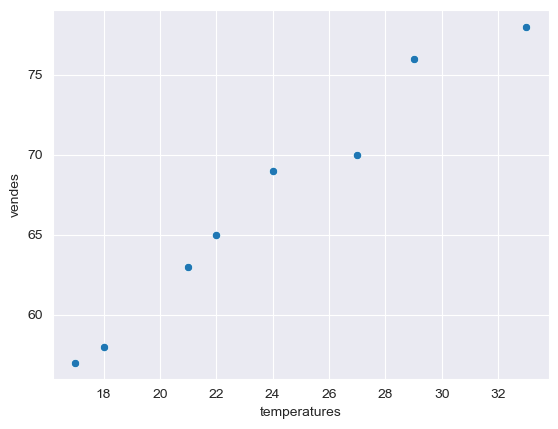

In [1]:
data = {'temperatures':[18,21,24,27,29,33,17,22],
        'vendes':[58,63,69,70,76,78,57,65]}

gelats = pd.DataFrame(data)
sns.set_style("darkgrid")
sns.scatterplot(data=gelats, x="temperatures", y="vendes")


<AxesSubplot:xlabel='temperatures', ylabel='vendes'>

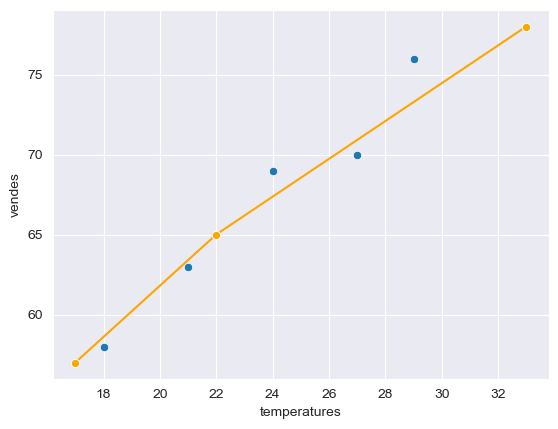

In [65]:
data = {'temperatures':[18,21,24,27,29,33,17,22],
        'vendes':[58,63,69,70,76,78,57,65],
        'p':['R','R','R','R','R','P','P','P']
       }

gelats = pd.DataFrame(data)
sns.set_style("darkgrid")
ax=sns.scatterplot(data=gelats[gelats.p=="R"], x="temperatures", y="vendes")
sns.lineplot(data=gelats[gelats.p=="P"],ax=ax.axes, x="temperatures", y="vendes", color="orange", marker='o', dashes=False)

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

x= gelats.temperatures
y= gelats.vendes
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_train = gelats.iloc[0:5]['temperatures'].values.reshape(-1,1)
x_test = gelats.iloc[5:]['temperatures'].values.reshape(-1,1)
y_train = gelats.iloc[0:5]['vendes'].values.reshape(-1,1)
y_test = gelats.iloc[5:]['vendes'].values.reshape(-1,1)



In [39]:
print ("------\nTRAIN\n------")
print(x_train)
print(y_train)
print ("------\nTEST\n------")
print(x_test)
print(y_test)

------
TRAIN
------
[[18]
 [21]
 [24]
 [27]
 [29]]
[[58]
 [63]
 [69]
 [70]
 [76]]
------
TEST
------
[[33]
 [17]
 [22]]
[[78]
 [57]
 [65]]


In [3]:
# Calculem la regressió
regression = LinearRegression()
#x_train
regression.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = regression.predict(x_test)
print(y_pred)
print ('---')
print(y_test)

[[81.23350254]
 [56.82741117]
 [64.45431472]]
---
[[78]
 [57]
 [65]]


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Mostrem els coeficent obtingut:
print('Coeficient \u03B21: %.5f' % regression.coef_)

# Valor del temre independent (X=0)
print('Terme independent \u03B20: %.5f' % regression.intercept_)

# Coeficient de R2
#print("Coeficient de determinació R^2:", regression.score(x, y))

# Error Quadràtic Mig (MSE)
print("MSE: %.4f" % mean_squared_error(y_test, y_pred, squared=True))

# Arrel de l'Error Quadràtic Mig (RMSE)
print("RMSE: %.4f" % mean_squared_error(y_test, y_pred,squared=False))

# R-quadrat 
print('R-quadrat: %.5f' % r2_score(y_test, y_pred))


Coeficient β1: 1.52538
Terme independent β0: 30.89594
MSE: 3.5944
RMSE: 1.8959
R-quadrat: 0.95200


[Text(0.5, 0, 'y_test'), Text(0, 0.5, 'y_pred')]

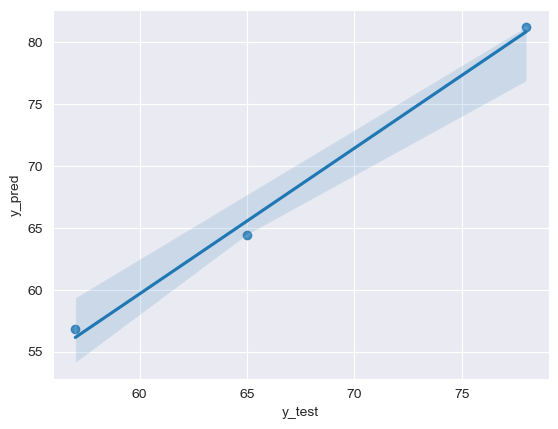

In [47]:
# Mostre ScatterPlot de y_pred i y_test
sns.set_style("darkgrid")
#sns.scatterplot(x=y_test, y=y_pred)
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y_test', ylabel='y_pred')
